## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [7]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [1]:
import pymc3 as pm

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [ ]:
#Bayesian Inference Lecture Notes: 
# 1) We do not make estimates of populations paramenters from the data
#2) Rather we maintain probability distributions for the population distributions which represent our qunantitative 
# belief about their value
# We start with probability priors, and we use observations to update them to probability posteriors.

# What is the difference between probability posteriors and likelihood?
# I would just say it like the conditional formula says it: the posterior is the probability of getting θ given some data D,
# the likelihood is the probability of getting D if the parameter θ is true.



In [ ]:
# example: Where's my cat? Suppose my cat is hidden behind one of two doors, but don't know which
# so my priors were 50%
# prior:
#    p(1) = p(2) = 0.5
# However, if I am able to oberve the tail, I am able to update these probabilites to 100% for door one.
# thus the observation can update the prior into posterior probability

In [2]:
# Baye's theorem: likelihood - probability of getting data for given population parameters
# p(Theta|y) = [p(y|Theta)p(Theta)]/[Integral of p(y|Theta)p(Theta)d(Theta)]

In [ ]:
# classic Bayesian problem.
# coin flip that doesn't seem equal

In [3]:
# Python context managers are passed object, usually to read and file automatically closed
# here we run pymc3 instructions inside this context

n = 100
k = 61

with pm.Model() as coin_context:
# p will be the actual fraction that heads comes up
    p = pm.Uniform ('p', 0.40, 0.80)
    y = pm.Binomial('y', n=n, p=p, observed=k)
    trace = pm.sample(10000)
    


/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 10 seconds.


In [4]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.517,0.697,0.001,0.0,8641.0,13644.0,1.0


In [ ]:
# I am getting different results from this than the example which had an hpd stat
# hpd = delimited credible interval

/tmp/ipykernel_3305/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

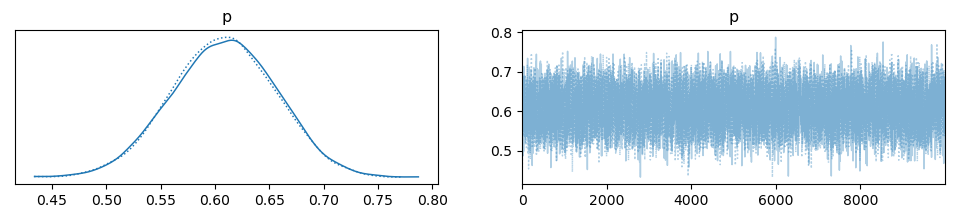

In [17]:
pm.traceplot(trace)

In [8]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')

In [10]:
gdata.sort_values('age5_surviving', inplace=True)

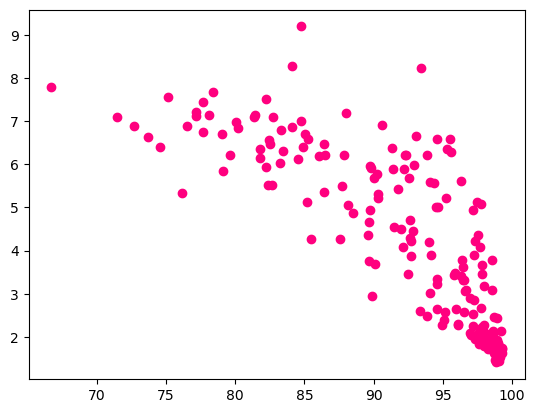

In [15]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'], color = '#FF007F')

In [22]:
#downward trend is what we want to reproduce, we create intercept, main term, and slope
with pm.Model() as gapminder_context:
#priors
    intercept = pm.Uniform('intercept', 5, 15)
    slope = pm.Uniform('slope', -1, 1)
    babies = pm.Normal ('babies',
                        mu = intercept + slope * (gdata['age5_surviving'] - 65),
                        sd = 1,
                        observed = gdata['babies_per_woman'])
    trace = pm.sample(10000)
    

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [slope, intercept]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.9009410606257148, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [23]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.190,0.287,9.652,10.737,0.005,0.003,3683.0,4062.0,1.0
slope,-0.219,0.010,-0.238,-0.199,0.000,0.000,3748.0,4058.0,1.0


/tmp/ipykernel_3305/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

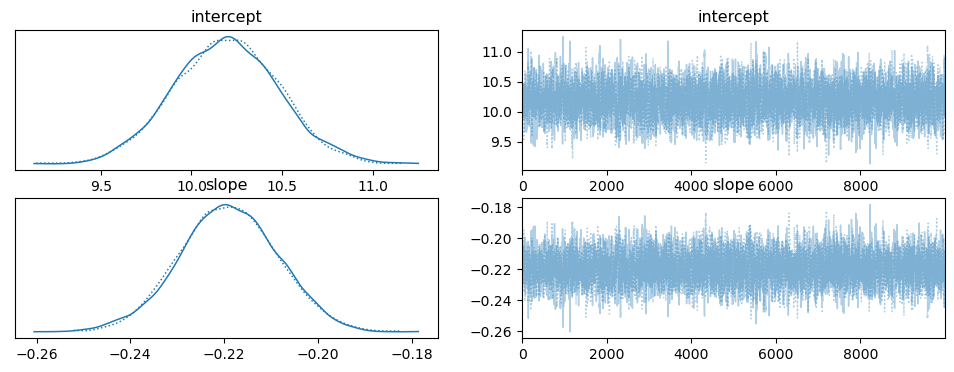

In [24]:
pm.traceplot(trace)

In [25]:
# intercept is centered a little bit above 10, 
# evaluated at the mean of the posterior, the model would look like the below

In [28]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

/tmp/ipykernel_3305/697457125.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.
  pp.plot(gdata['age5_surviving'], babies, 'C1', color = '#000000')


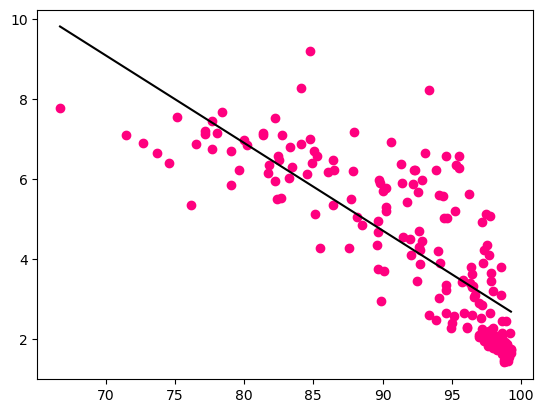

In [29]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'], color = '#FF007F')
pp.plot(gdata['age5_surviving'], babies, 'C1', color = '#000000')

In [ ]:
# This is our Bayesian model, 

/tmp/ipykernel_3305/2188435259.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.
  pp.plot(gdata['age5_surviving'], babies, 'C1', alpha=0.5, color = '#d4af37')


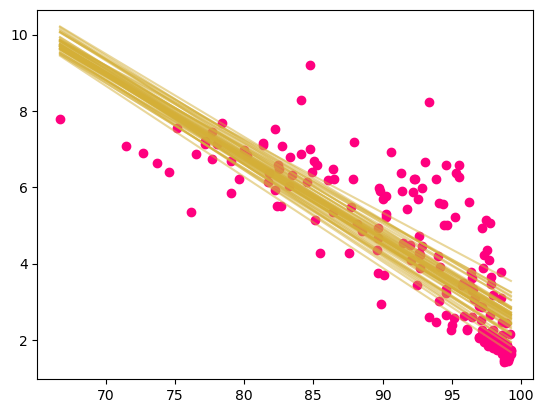

In [39]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'], color = '#FF007F')
# take every 50th point and stop after 100 points with the range
for i, intercept, slope in zip(range(100), trace['intercept'][:50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'], babies, 'C1', alpha=0.5, color = '#d4af37')